In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
MarchMadness_df = pd.read_csv('/kaggle/input/2024-march-madness-statistical-analysis/DEV _ March Madness.csv')

In [77]:
#creating new features
MarchMadness_df['March Madness'] = 0
MarchMadness_df['Sweet Sixteen'] = 0
MarchMadness_df['Elite Eight'] = 0
MarchMadness_df['Final Four'] = 0 
MarchMadness_df['Championship'] = 0 
MarchMadness_df['Champions'] = 0


in_tournament_df = pd.read_csv('/kaggle/input/2023-2013/InTournament - 2023-2013 (1).csv')

# Merge DataFrames on 'Season' and 'Team Name'
merged_df = MarchMadness_df.merge(in_tournament_df, on=['Season', 'Team Name'], how='left')

# Update 'March Madness' and 'Elite Eight' based on conditions
MarchMadness_df['March Madness'] = merged_df.apply(lambda row: 1 if pd.notnull(row['March Madness_y']) else 0, axis=1)
MarchMadness_df['Sweet Sixteen'] = merged_df.apply(lambda row: 1 if row['Sweet Sixteen_y'] == True else 0, axis=1)
MarchMadness_df['Elite Eight'] = merged_df.apply(lambda row: 1 if row['Elite Eight_y'] == True else 0, axis=1)
MarchMadness_df['Final Four'] = merged_df.apply(lambda row: 1 if row['Final Four_y'] == True else 0, axis=1)
MarchMadness_df['Championship']  = merged_df.apply(lambda row: 1 if row['Championship_y'] == True else 0, axis=1)
MarchMadness_df['Champions'] = merged_df.apply(lambda row: 1 if row['Champions_y'] == True else 0, axis=1)

#removing any team that is not in March Madness
MarchMadness_df = MarchMadness_df[MarchMadness_df['March Madness'] == 1]

In [78]:
# Setting default Experience to 0
MarchMadness_df['Experience'] = 0

# Function to calculate experience based on the last three seasons
def calculate_experience(row, df):
    # Find rows for the previous three seasons for the same team
    previous_seasons_df = df[(df['Team Name'] == row['Team Name']) &
                             (df['Season'] < row['Season']) &
                             (df['Season'] >= row['Season'] - 3)]
    
    # Calculate the experience as the sum of wins in Sweet Sixteen, Elite Eight,
    # Final Four, Championship, and Champions
    experience = previous_seasons_df[['Sweet Sixteen', 'Elite Eight', 'Final Four', 
                                      'Championship', 'Champions']].sum().sum()
    return experience

# Calculate the experience for each row
MarchMadness_df['Experience'] = MarchMadness_df.apply(lambda row: calculate_experience(row, MarchMadness_df), axis=1)

# Display the DataFrame with the new 'Experience' column
MarchMadness_df


,Season,Team Name,Conference,Historical Conference,Adjusted Temo,Adjusted Tempo Rank,Raw Tempo,Raw Tempo Rank,Adjusted Offensive Efficiency,Adjusted Offensive Efficiency Rank,...,Seed,Region,Post-Season Tournament,Post-Season Tournament Sorting Index,March Madness,Sweet Sixteen,Elite Eight,Final Four,Championship,Champions
0,2015,Kentucky,Southeastern Conference (SEC),Southeastern Conference (SEC),62.4,274,63.8,242,121.3,6,...,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5,1,1,1,1,0,0
1,2021,Gonzaga,West Coast Conference (WCC),West Coast Conference (WCC),73.8,7,74.3,14,126.4,1,...,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5,1,1,1,1,1,0
3,2019,Virginia,Atlantic Coast Conference (ACC),Atlantic Coast Conference (ACC),59.4,353,60.6,353,123.4,2,...,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5,1,1,1,1,1,1
5,2021,Baylor,Big 12 Conference,Big 12 Conference,67.4,213,69.3,170,125.0,2,...,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5,1,1,1,1,1,1
6,2015,Wisconsin,Big Ten Conference (Big 10),Big Ten Conference (Big 10),58.7,345,59.5,344,129.0,1,...,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6414,2016,Fairleigh Dickinson,Northeast Conference (NEC),Northeast Conference (NEC),71.5,43,72.1,49,104.4,177,...,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5,1,0,0,0,0,0
6529,2023,Texas Southern,Southwestern Conference (SWC),Southwestern Conference (SWC),69.1,76,70.7,48,95.4,337,...,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5,1,0,0,0,0,0
6579,2016,Holy Cross,Patriot League,Patriot League,63.6,339,64.7,340,97.1,307,...,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5,1,0,0,0,0,0
6593,2019,North Carolina Central,Mid-Eastern Athletic Conference (MEAC),Mid-Eastern Athletic Conference (MEAC),65.3,291,66.9,280,97.8,295,...,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5,1,0,0,0,0,0


In [79]:
MarchMadness_df['Experience'].head()

0    4
1    3
3    2
5    0
6    3
Name: Experience, dtype: int64

In [80]:
#removing any unhelpful features
MarchMadness_df.drop(['Conference', 'Historical Conference','Active Coaching Length', 'Seed','Post-Season Tournament', 'Post-Season Tournament Sorting Index', 'Region', 'Current coach'], axis=1, inplace=True)


In [81]:
# Assuming 'MarchMadness_df' is your DataFrame
# First, drop non-numeric or irrelevant columns. Keep 'Elite Eight'.
MarchMadness_df_numeric = MarchMadness_df.drop(['Team Name'], axis=1)

# Now, compute the correlation matrix for the numeric columns, including 'Elite Eight'
corr_matrix = MarchMadness_df_numeric.corr()
corr_with_elite_eight = corr_matrix['Elite Eight']

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
# Sort the correlations
sorted_corr = corr_with_elite_eight.sort_values()

# Top 10 negative correlations
top_neg_corr = sorted_corr.head(8)

# Top 10 positive correlations
top_pos_corr = sorted_corr.tail(15)

# Combine both into a single DataFrame
top_correlations_df = pd.concat([top_neg_corr, top_pos_corr], axis=0).to_frame(name='Correlation with Elite Eight')

print(top_correlations_df)

                                    Correlation with Elite Eight
Adjusted Defensive Efficiency                          -0.305835
AdjDE                                                  -0.305599
RankAdjEM                                              -0.286751
Net Rating Rank                                        -0.286081
RankAdjOE                                              -0.267958
Adjusted Offensive Efficiency Rank                     -0.267958
Adjusted Defensive Efficiency Rank                     -0.257367
RankAdjDE                                              -0.257367
FG2Pct                                                  0.177294
eFGPct                                                  0.190405
Experience                                              0.198714
Raw Offensive Efficiency                                0.285942
OE                                                      0.285951
Champions                                               0.343401
AdjOE                    

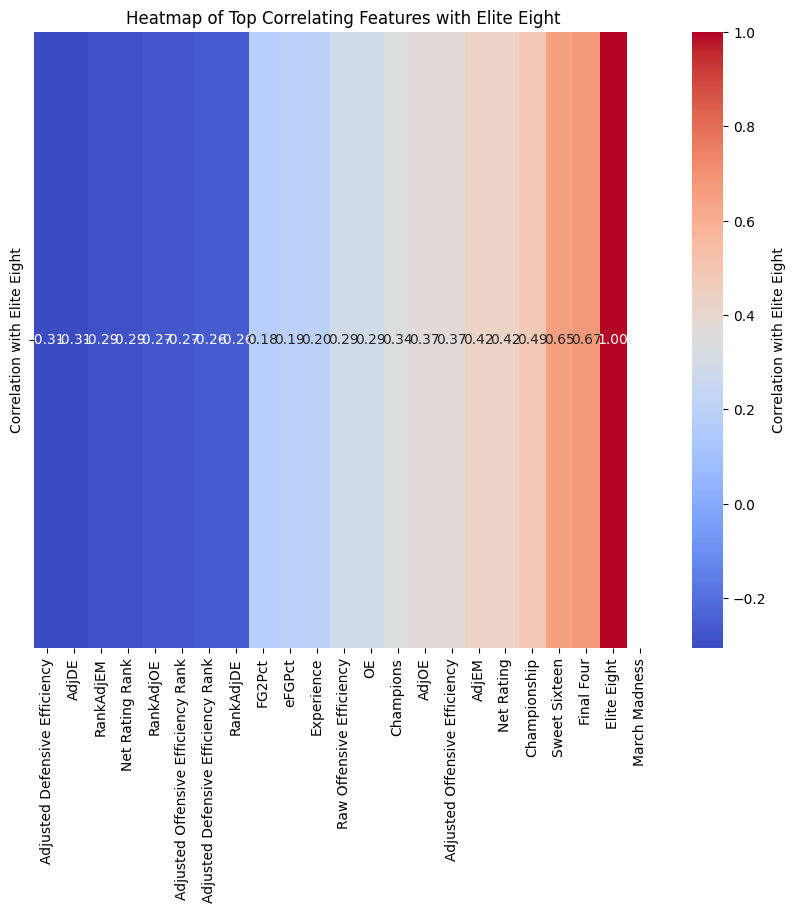

In [83]:
plt.figure(figsize=(10, 8))
sns.heatmap(top_correlations_df.transpose(), annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation with Elite Eight'})
plt.title('Heatmap of Top Correlating Features with Elite Eight')
plt.show()

In [84]:

Full_Final_df = pd.merge(MarchMadness_df, in_tournament_df, on=['Season', 'Team Name'], how='inner')
Full_Final_df.head()

,Season,Team Name,Adjusted Temo,Adjusted Tempo Rank,Raw Tempo,Raw Tempo Rank,Adjusted Offensive Efficiency,Adjusted Offensive Efficiency Rank,Raw Offensive Efficiency,Raw Offensive Efficiency Rank,...,Sweet Sixteen_y,Elite Eight_y,Final Four_y,Championship_y,Champions_y,Color,Location,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2015,Kentucky,62.4,274,63.8,242,121.3,6,115.5,9,...,True,True,True,False,False,blue,South,NaN,NaN,NaN
1,2021,Gonzaga,73.8,7,74.3,14,126.4,1,121.9,1,...,True,True,True,True,False,blue,West,NaN,NaN,NaN
2,2019,Virginia,59.4,353,60.6,353,123.4,2,116.6,4,...,True,True,True,True,True,orange,South,NaN,NaN,NaN
3,2021,Baylor,67.4,213,69.3,170,125.0,2,119.1,2,...,True,True,True,True,True,green,South,NaN,NaN,NaN
4,2015,Wisconsin,58.7,345,59.5,344,129.0,1,121.1,1,...,True,True,True,True,False,red,Midwest,NaN,NaN,NaN


In [104]:
Final_Features = ['Season','Team Name', 'Net Rating','Raw Offensive Efficiency','Adjusted Offensive Efficiency','Experience','Adjusted Defensive Efficiency', 'RankAdjEM', 'Net Rating Rank', 'Adjusted Offensive Efficiency Rank','Elite Eight_y']
Final_df = Full_Final_df[Final_Features]

In [102]:
Final_df.head(30)

,Season,Team Name,Net Rating,Raw Offensive Efficiency,Adjusted Offensive Efficiency,Experience,Adjusted Defensive Efficiency,RankAdjEM,Net Rating Rank,Adjusted Offensive Efficiency Rank,Elite Eight_y,Location
0,2015,Kentucky,36.9,115.5,121.3,4,84.4,1,1,6,True,South
1,2021,Gonzaga,36.5,121.9,126.4,3,89.9,1,2,1,True,West
2,2019,Virginia,34.2,116.6,123.4,2,89.2,1,4,2,True,South
3,2021,Baylor,33.9,119.1,125.0,0,91.1,2,6,2,True,South
4,2015,Wisconsin,33.8,121.1,129.0,3,95.2,2,7,1,True,Midwest
5,2018,Villanova,33.8,122.7,127.8,5,94.0,1,7,1,True,East
6,2019,Gonzaga,32.9,122.6,124.5,6,91.6,2,11,1,True,West
7,2013,Louisville,32.9,110.5,117.7,0,84.8,1,11,7,True,South
8,2015,Duke,32.5,119.7,124.5,2,92.0,3,17,3,True,East
9,2015,Arizona,32.4,114.4,119.9,3,87.5,4,18,7,True,West


In [105]:
import warnings
warnings.filterwarnings("ignore")
# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [106]:
# Reading the Dataset
df = Final_df

In [108]:
#Setting the value for X and Y
X = df[['Net Rating','Raw Offensive Efficiency','Adjusted Offensive Efficiency','Experience','Adjusted Defensive Efficiency', 'RankAdjEM', 'Net Rating Rank', 'Adjusted Offensive Efficiency Rank']]
y = df['Elite Eight_y']

In [109]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)


In [110]:
y_train.shape

(452,)

In [111]:
y_test.shape

(194,)

In [112]:
reg_model = linear_model.LinearRegression()

In [113]:
#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [114]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  -2.068493116745479


[('Net Rating', 0.0385314547316047),
 ('Raw Offensive Efficiency', -0.004788007041522367),
 ('Adjusted Offensive Efficiency', 0.026299356618486636),
 ('Experience', -0.021274399950867738),
 ('Adjusted Defensive Efficiency', -0.01223209811311809),
 ('RankAdjEM', -0.005423835773874122),
 ('Net Rating Rank', 0.0004892447114199444),
 ('Adjusted Offensive Efficiency Rank', 0.0008796099374049561)]

In [115]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [116]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 0.25172478 -0.01540147  0.06888901 -0.05662589  0.35790169 -0.11640744
 -0.01442061  0.04425582  0.24311563  0.12657426  0.01189541  0.22497511
 -0.02831787  0.07885391  0.10028905  0.22215791 -0.04976985 -0.07592137
  0.0952632  -0.02971269  0.00404925 -0.05764562  0.13383755  0.29480861
  0.07950287 -0.00656326  0.46693066  0.00701432  0.31038502 -0.02673682
  0.06980517  0.17943695 -0.03921734  0.09660292  0.02296818  0.83439402
 -0.04032474  0.02818346  0.11314033  0.28502923 -0.06745904  0.07840595
  0.03760896  0.18316178  0.04163033  0.31479507  0.05435673  0.17267977
  0.25152237  0.09127576  0.01643445  0.04591198  0.43172082 -0.02321821
  0.05727453  0.04230972 -0.04443033  0.07091131  0.02373775  0.49002225
 -0.04285152  0.02563671 -0.02725636  0.26598934  0.02385118 -0.03345768
 -0.00911703  0.15934194  0.12417257  0.15712374  0.38732861 -0.05203307
  0.03669501  0.27556975  0.00826161  0.07309875  0.08603494  0.10678219
 -0.07609097  0.0159876  -

In [117]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
149,False,0.251725
545,False,-0.015401
380,False,0.068889
575,False,-0.056626
73,False,0.357902
...,...,...
378,False,0.031703
580,False,-0.062448
27,True,0.566592
638,False,0.128391


In [118]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 0.15504854755895592
Mean Square Error: 0.0644048076576436
Root Mean Square Error: 0.25378102304475725


In [119]:
from sklearn.utils import resample

# Number of bootstrap samples
n_bootstraps = 100

# Lists to store coefficients from each bootstrap
intercepts = []
coefficients = []

# Perform bootstrapping
for _ in range(n_bootstraps):
    # Resample with replacement
    X_boot, y_boot = resample(X_train, y_train, random_state=_)
    
    # Fit model on bootstrapped sample
    reg_model_boot = LinearRegression().fit(X_boot, y_boot)
    
    # Store intercept and coefficients
    intercepts.append(reg_model_boot.intercept_)
    coefficients.append(reg_model_boot.coef_)

# Convert lists to arrays
intercepts = np.array(intercepts)
coefficients = np.array(coefficients)

# Calculate mean and standard error for intercept and coefficients
mean_intercept = np.mean(intercepts)
std_intercept = np.std(intercepts)
mean_coefficients = np.mean(coefficients, axis=0)
std_coefficients = np.std(coefficients, axis=0)

# Printing the results
print("Mean Intercept:", mean_intercept)
print("Standard Error of Intercept:", std_intercept)
print("Mean Coefficients:", mean_coefficients)
print("Standard Error of Coefficients:", std_coefficients)

Mean Intercept: -2.098767371914159
Standard Error of Intercept: 0.8215802925784698
Mean Coefficients: [ 0.03861457 -0.0044239   0.02627107 -0.0214889  -0.01234351 -0.00575148
  0.00050472  0.00089612]
Standard Error of Coefficients: [0.00329037 0.0042844  0.0048281  0.01206385 0.00484332 0.00244282
 0.00011779 0.00056822]


Final_df

In [122]:
team = Final_df.iloc[27]
print(team)

Season                                    2016
Team Name                             Virginia
Net Rating                                29.6
Raw Offensive Efficiency                 115.2
Adjusted Offensive Efficiency            120.6
Experience                                   1
Adjusted Defensive Efficiency             91.0
RankAdjEM                                    4
Net Rating Rank                             48
Adjusted Offensive Efficiency Rank           8
Elite Eight_y                             True
Name: 27, dtype: object
